In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [3]:
resutls = pickle.load(open('../results/chemostat_solutions_all_particles.pkl','rb'))

In [3]:
def print_rxn(model,rxn_id):
    rxn = model.reactions.get_by_id(rxn_id)
    print(rxn.id)
    print(rxn.name)
    eq = rxn.reaction
    for met in rxn.metabolites: eq = eq.replace(met.id,met.name+'_'+met.compartment)
    print(eq)
    print(rxn.gene_reaction_rule)
    print('')

In [4]:
def plot_a_flux(name,thr=0,label=None):
    X = list()
    Ts = np.arange(30,40,0.2) + 273.15
    for part in resutls: 
        f = [s.fluxes[name] for s in part]
        f.extend([np.nan]*(len(Ts)-len(f)))
        X.append(f)
    X = np.array(X)
    ps = np.nanpercentile(X,[5,50,95],axis=0)
    
    ps = ps[:,Ts<38.+273.15]
    Ts = Ts[Ts<38.+273.15]
    if np.max(ps[1,:])>thr: 
        plt.plot(Ts-273.15,ps[1,:],label=label)
        plt.fill_between(Ts-273.15,ps[0,:],ps[2,:],alpha=0.5)

        plt.xlim([30,39.])
        print_rxn(model,name)
    #plt.ylim(np.min(ps[0,:])*0.8, np.max(ps[2,:])*1.1)
    #plt.show()

In [13]:
def plot_paper_figure():
    
    
    r1 = 'prot_pool_exchange' # protein pool
    #r2 = 'r_1714_REV' # glucose
    #r3 = 'r_1761'     # ethanol
    #r4 = 'r_0962No1'
    rxn_labels = {
    'r_0446_REVNo1': 'ATP produced by ADE3 (C1 Metabolism)',
    'r_0892No1': 'ATP produced by PGK1 (Glycolysis)',
    'r_0962No1': 'ATP produced by CDC19 (Glycolysis)',
    'r_1110': 'ATP produced by Mitochondria'
    }
    colors = {
        'r_0446_REVNo1': '#1b9e77',
        'r_0892No1':'#d95f02',
        'r_0962No1': '#7570b3',
        'r_1110':'#e7298a'
    }
    
    def _do_plot(name,ax,label,scale=1,c=None):
        X = list()
        Ts = np.arange(30,40,0.2) + 273.15
        for part in resutls: 
            f = [s.fluxes[name] for s in part]
            f.extend([np.nan]*(len(Ts)-len(f)))
            X.append(f)
        X = np.array(X)
        ps = np.nanpercentile(X,[5,50,95],axis=0)/scale

        ps = ps[:,Ts<38.5+273.15]
        Ts = Ts[Ts<38.5+273.15]
        ax.plot(Ts-273.15,ps[1,:],label=label,color=c)
        ax.fill_between(Ts-273.15,ps[0,:],ps[2,:],alpha=0.5,color=c)

        ax.set_xlim([30,39.])
        #plt.ylim(np.min(ps[0,:])*0.8, np.max(ps[2,:])*1.1)
    
    fig = plt.figure(figsize=(4,3))
    ax = fig.add_subplot(111)
    ax1 = ax.twinx()
    for rxn_id, label in rxn_labels.items(): _do_plot(rxn_id,ax,label,c=colors[rxn_id])
    ax.plot([],[],label='Protein',color='k')
    ax.plot([],[],'--',label='Maximal protein amount',color='k')
    
    #_do_plot(r2,ax,'Glucose')
    #_do_plot(r3,ax,'Ethanol')
    _do_plot(r1,ax1,'Protein',0.5,'k')
    xlim = [30,39]
    ax1.plot(xlim,[0.17866,0.17866],'--',label=None,color='gray')
    ax1.set_ylim(0,0.2)
    ax1.set_yticks(np.arange(0,0.25,0.05))
    ax.set_ylim(0,15)
    ax.set_xlim(xlim)
    ax.legend(bbox_to_anchor=(0, 1.02, 1., 0.),loc='lower center', borderaxespad=0,fontsize=9.5,mode='expand')
    ax.set_ylabel('ATP [cytoplasm] (mmol/gDW/h)')
    ax1.set_ylabel('Protein amount (g/gDW)')
    ax.set_xlabel('Temperature ($^\circ$C)')
    
    plt.savefig('../figures/atp_production_chemo.pdf',bbox_inches='tight')
    plt.show()

In [7]:
def get_fluxes_from_solutions(rxn_id,chemostats, Ts):
    # fluxes: 2d array, with temperature as columns and particles as rows
    fluxes = []
    for p in chemostats:
        lst = [s.fluxes[rxn_id] for s in p]
        if len(lst)<len(Ts): lst.extend([np.nan for i in range(len(Ts)-len(lst))])
        fluxes.append(lst)
    
    return np.array(fluxes)

In [133]:
?plt.savefig

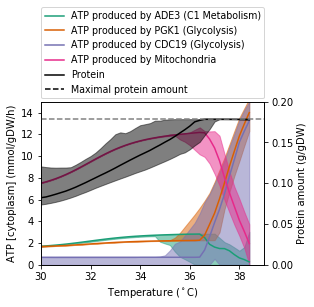

In [14]:
plot_paper_figure()

In [4]:
model = pickle.load(open('../models/aerobic.pkl','rb'))

Academic license - for non-commercial use only
Read LP format model from file /tmp/tmpjuul8_c3.lp
Reading time = 0.57 seconds
: 3389 rows, 13486 columns, 49610 nonzeros


In [10]:
for met in model.metabolites:
    if 'ATP' in met.name: print(met.id,met.name,met.compartment)

s_0326 5-phosphoribosyl-ATP c
s_0434 ATP c
s_0435 ATP er
s_0437 ATP m
s_0438 ATP n
s_0439 ATP p
s_0586 dATP c
s_2831 ATP erm
s_2840 ATP lp
s_2856 ATP ce
s_3341 ATP vm
s_3359 ATP gm


In [11]:
atp = model.metabolites.get_by_id('s_0434')

In [15]:
print_rxn(model,'r_1110')

r_1110
ADP/ATP transporter
ADP_c + ATP_m --> ADP_m + ATP_c
(YBL030C or YBR085W or YMR056C)



In [6]:
atp_producing_rxns = list()
atp = model.metabolites.get_by_id('s_0434')
for rxn in atp.reactions:
    if rxn.get_coefficient(atp)>0: atp_producing_rxns.append(rxn.id)
print(len(atp_producing_rxns))

21
